In [15]:
import pandas as pd
import numpy as np
import os

def extract_revenue_and_metrics(input_filename, output_filename):
    """
    Extract specified columns including Revenue, At Risk, Publication,
    and the demographic metrics from the CSV file in the Downloads directory.
    Removes rows where Publication is missing.
    
    Parameters:
    input_filename (str): Name of the input CSV file in Downloads directory
    output_filename (str): Path to save the output CSV file
    """
    try:
        # Get the path to the Downloads directory
        downloads_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
        input_filepath = os.path.join(downloads_dir, input_filename)
        
        # Check if the file exists
        if not os.path.exists(input_filepath):
            print(f"Error: File not found at {input_filepath}")
            print("Please check if the file exists in your Downloads folder.")
            return False
        
        print(f"Reading file from: {input_filepath}")
        
        # Read the CSV file
        df = pd.read_csv(input_filepath)
        print(f"Successfully read the file")
        print(f"Original row count: {len(df)}")
        
        # Define columns we want to keep - updated to include At Risk and Publication
        target_columns = [
            'CI',
            'At Risk',
            'Publication',
            'Current Revenue',
            'Population w/in Territory',
            'HHI',
            'Home Value',
            '# Businesses'
        ]
        
        # Verify that the columns exist
        missing_columns = [col for col in target_columns if col not in df.columns]
        if missing_columns:
            print(f"Warning: The following columns are missing from the CSV: {missing_columns}")
            print("Available columns are:")
            for col in df.columns:
                print(f"- {col}")
            
            # Try to find similar column names for missing columns
            for missing_col in missing_columns:
                for col in df.columns:
                    if missing_col.lower().replace(" ", "") in col.lower().replace(" ", ""):
                        print(f"Possible match for '{missing_col}': '{col}'")
        
        # Keep only columns that exist in the DataFrame
        columns_to_keep = [col for col in target_columns if col in df.columns]
        
        print(f"\nExtracting these columns: {columns_to_keep}")
        
        # Create a new dataframe with only the desired columns
        result_df = df[columns_to_keep]
        
        # Remove rows where Publication is missing or empty
        if 'Publication' in result_df.columns:
            # Count rows with missing publications before filtering
            missing_pub_count = result_df['Publication'].isna().sum()
            empty_pub_count = len(result_df[result_df['Publication'].astype(str).str.strip() == ''])
            total_missing = missing_pub_count + empty_pub_count
            
            print(f"\nRemoving rows without publication values:")
            print(f"- Null/NaN publication values: {missing_pub_count}")
            print(f"- Empty string publication values: {empty_pub_count}")
            print(f"- Total rows to remove: {total_missing}")
            
            # Filter out rows with missing Publication
            result_df = result_df.dropna(subset=['Publication'])
            
            # Filter out rows with empty string Publication
            result_df = result_df[result_df['Publication'].astype(str).str.strip() != '']
            
            print(f"Row count after removing empty publications: {len(result_df)}")
        else:
            print("Warning: 'Publication' column not found, cannot filter based on it")
        
        # Create output path in the Downloads directory
        output_filepath = os.path.join(downloads_dir, output_filename)
        
        # Save to a new CSV file
        result_df.to_csv(output_filepath, index=False)
        print(f"Successfully created {output_filepath}")
        print(f"Extracted {len(result_df)} rows of data")
        
        # Count missing values in each column for verification
        print("\nMissing values in each column:")
        for col in result_df.columns:
            missing_count = result_df[col].isna().sum()
            if missing_count > 0:
                missing_percent = (missing_count / len(result_df)) * 100
                print(f"- {col}: {missing_count} missing values ({missing_percent:.1f}%)")
        
        return True, output_filepath
    
    except Exception as e:
        print(f"Error processing file: {e}")
        print(f"Full error details: {type(e).__name__}: {e}")
        
        # If there's an error, let's try to read and print the column names directly
        try:
            with open(input_filepath, 'r', encoding='utf-8') as f:
                header = f.readline().strip()
                print("\nActual CSV header row:")
                print(header)
                columns = header.split(',')
                print("\nParsed column names:")
                for i, col in enumerate(columns):
                    print(f"{i}: {col}")
        except Exception as nested_error:
            print(f"Could not read header directly: {nested_error}")
            
        return False, None

if __name__ == "__main__":
    # Define input and output file names
    input_file = "Territory Eval By Revenue.csv"
    output_file = "Territory_Metrics_With_Publications.csv"
    
    # Process the file
    success, output_path = extract_revenue_and_metrics(input_filename=input_file, output_filename=output_file)
    
    if success:
        print(f"\nData has been successfully extracted to {output_file} in your Downloads folder")
        
        # Provide a preview of the data
        try:
            preview_df = pd.read_csv(output_path)
            print("\nPreview of the extracted data:")
            print(preview_df.head(3))  # Show just 3 rows for brevity
            
            # Show publication counts
            pub_counts = preview_df['Publication'].value_counts()
            print(f"\nNumber of unique publications: {len(pub_counts)}")
            print("\nTop 5 publications by count:")
            print(pub_counts.head(5))
        except Exception as e:
            print(f"Could not generate preview: {e}")
    else:
        print("Failed to extract data")

Reading file from: /Users/bentodd/Downloads/Territory Eval By Revenue.csv
Successfully read the file
Original row count: 141

Extracting these columns: ['CI', 'At Risk', 'Publication', 'Current Revenue', 'Population w/in Territory', 'HHI', 'Home Value', '# Businesses']

Removing rows without publication values:
- Null/NaN publication values: 23
- Empty string publication values: 0
- Total rows to remove: 23
Row count after removing empty publications: 118
Successfully created /Users/bentodd/Downloads/Territory_Metrics_With_Publications.csv
Extracted 118 rows of data

Missing values in each column:
- CI: 101 missing values (85.6%)

Data has been successfully extracted to Territory_Metrics_With_Publications.csv in your Downloads folder

Preview of the extracted data:
              CI  At Risk      Publication Current Revenue  \
0    Trailblazer    False          Boulder        $109,024   
1  Administrator    False         Franklin         $96,599   
2    Enterpriser    False  Paradise Va

Total rows: 118
Clean rows after removing NaN values: 118

Correlation Coefficients with Revenue:
Population: 0.0450 (R² = 0.20%)
HHI: 0.2270 (R² = 5.15%)
HomeValue: 0.3299 (R² = 10.88%)
Businesses: 0.1769 (R² = 3.13%)

Full Correlation Matrix:
            Revenue  Population     HHI  HomeValue  Businesses
Revenue      1.0000      0.0450  0.2270     0.3299      0.1769
Population   0.0450      1.0000 -0.2148    -0.1124      0.5317
HHI          0.2270     -0.2148  1.0000     0.6969      0.2638
HomeValue    0.3299     -0.1124  0.6969     1.0000      0.3167
Businesses   0.1769      0.5317  0.2638     0.3167      1.0000

Interpretation Guidelines for Correlation Coefficients:
0.00 to 0.19: Very weak correlation
0.20 to 0.39: Weak correlation
0.40 to 0.59: Moderate correlation
0.60 to 0.79: Strong correlation
0.80 to 1.00: Very strong correlation

Multiple Regression Results:
R² for multiple regression model: 0.1168 (11.68%)
Coefficients:
Population: 0.0580
HHI: 0.0029
HomeValue: 0.0093
Busi

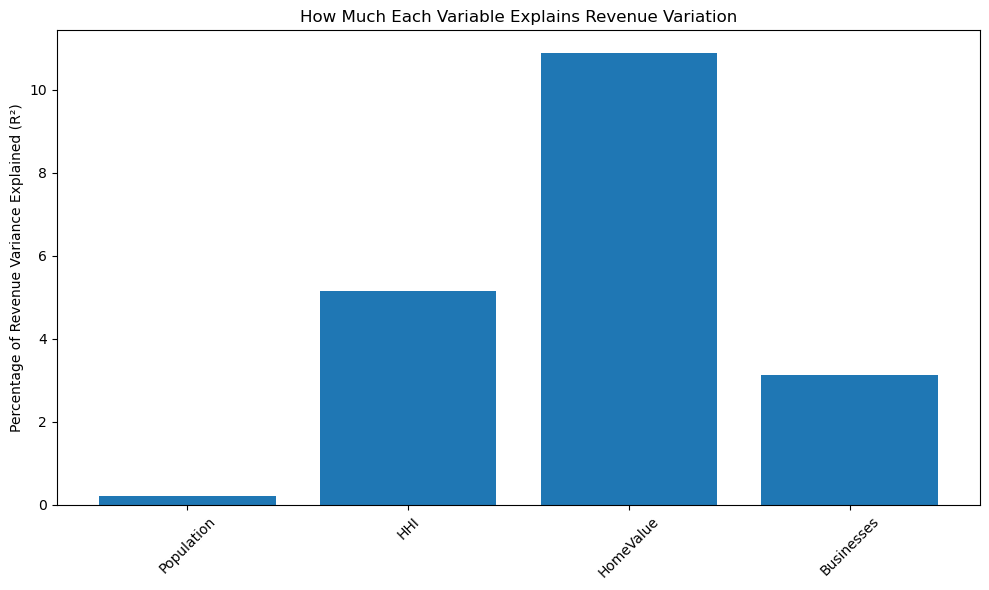

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Read the CSV file
df = pd.read_csv('Downloads/Territory_Metrics_With_Publications.csv')

# Clean the numeric columns (remove currency symbols, commas, etc.)
numeric_columns = ['Current Revenue', 'Population w/in Territory', 'HHI', 'Home Value', '# Businesses']

for col in numeric_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

# Rename columns for easier handling
df = df.rename(columns={
    'Current Revenue': 'Revenue',
    'Population w/in Territory': 'Population',
    'Home Value': 'HomeValue',
    '# Businesses': 'Businesses'
})

# Drop rows with NaN values in relevant columns
clean_df = df[['Revenue', 'Population', 'HHI', 'HomeValue', 'Businesses']].dropna()

print(f"Total rows: {len(df)}")
print(f"Clean rows after removing NaN values: {len(clean_df)}")

# Calculate correlation coefficients between Revenue and each variable
variables = ['Population', 'HHI', 'HomeValue', 'Businesses']
correlations = {}
r_squared = {}

print("\nCorrelation Coefficients with Revenue:")
for var in variables:
    corr, _ = pearsonr(clean_df['Revenue'], clean_df[var])
    correlations[var] = corr
    r_squared[var] = corr**2
    print(f"{var}: {corr:.4f} (R² = {r_squared[var]*100:.2f}%)")

# Generate a full correlation matrix
correlation_matrix = clean_df[['Revenue', 'Population', 'HHI', 'HomeValue', 'Businesses']].corr()
print("\nFull Correlation Matrix:")
print(correlation_matrix.round(4))

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', 
            linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()

# Create a bar chart for R-squared values
plt.figure(figsize=(10, 6))
plt.bar(variables, [r_squared[var]*100 for var in variables])
plt.ylabel('Percentage of Revenue Variance Explained (R²)')
plt.title('How Much Each Variable Explains Revenue Variation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('r_squared_chart.png')

print("\nInterpretation Guidelines for Correlation Coefficients:")
print("0.00 to 0.19: Very weak correlation")
print("0.20 to 0.39: Weak correlation")
print("0.40 to 0.59: Moderate correlation")
print("0.60 to 0.79: Strong correlation")
print("0.80 to 1.00: Very strong correlation")

# Optional: Multiple Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare X (features) and y (target)
X = clean_df[variables]
y = clean_df['Revenue']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate R² for the multiple regression model
y_pred = model.predict(X)
model_r2 = r2_score(y, y_pred)

print("\nMultiple Regression Results:")
print(f"R² for multiple regression model: {model_r2:.4f} ({model_r2*100:.2f}%)")
print("Coefficients:")
for var, coef in zip(variables, model.coef_):
    print(f"{var}: {coef:.4f}")

Dataset shape: (168, 11)

Column names:
['magazine_id', 'magazine_name', 'start_date', 'is_active', 'first_signed_contract_date', 'months_to_start', 'three_month_value', 'avg_contract_term_months', 'contract_count', 'tier_name', 'current_revenue']

Converting 7 negative months_to_start values to NaN

Correlations with current_revenue:
months_to_start: r = -0.1314, r² = 0.0173 (1.73%), p-value = 0.0967
  Based on 161 valid data points
three_month_value: r = 0.2495, r² = 0.0623 (6.23%), p-value = 0.0011
  Based on 168 valid data points
avg_contract_term_months: r = -0.2145, r² = 0.0460 (4.60%), p-value = 0.0052
  Based on 168 valid data points
contract_count: r = 0.2420, r² = 0.0585 (5.85%), p-value = 0.0016
  Based on 168 valid data points

Full Correlation Matrix:
                          months_to_start  three_month_value  \
months_to_start                    1.0000            -0.6712   
three_month_value                 -0.6712             1.0000   
avg_contract_term_months         

/var/folders/21/r3y1680j1xs9jgg6jhnydf3m0000gn/T/ipykernel_99725/2973530088.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_count_stats = df.groupby('contract_count_bin').agg({
/var/folders/21/r3y1680j1xs9jgg6jhnydf3m0000gn/T/ipykernel_99725/2973530088.py:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_term_stats = df.groupby('contract_term_bin').agg({



Saved correlation heatmap to 'magazine_correlations.png'


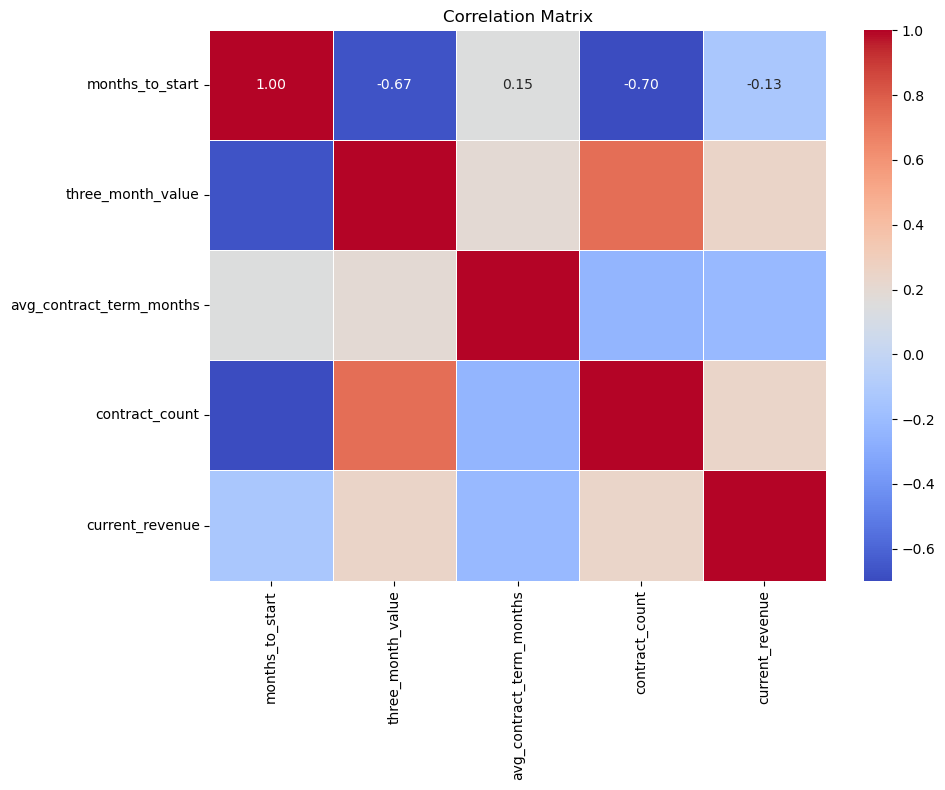

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_magazine_correlations(csv_file):
    """
    Analyze correlations in magazine revenue data, treating negative months_to_start as null.
    
    Parameters:
    csv_file (str): Path to the CSV file
    """
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Basic info about the dataset
    print(f"Dataset shape: {df.shape}")
    print("\nColumn names:")
    print(df.columns.tolist())
    
    # Replace negative months_to_start with NaN
    neg_months_count = sum(df['months_to_start'] < 0)
    print(f"\nConverting {neg_months_count} negative months_to_start values to NaN")
    df.loc[df['months_to_start'] < 0, 'months_to_start'] = np.nan
    
    # Calculate correlations with current_revenue
    revenue_correlations = {}
    correlation_columns = [
        'months_to_start', 
        'three_month_value', 
        'avg_contract_term_months',
        'contract_count'
    ]
    
    print("\nCorrelations with current_revenue:")
    for col in correlation_columns:
        if col in df.columns:
            # Drop rows where either value is NaN for this correlation
            valid_data = df[[col, 'current_revenue']].dropna()
            
            if len(valid_data) >= 2:  # Need at least 2 points to calculate correlation
                r, p = pearsonr(valid_data[col], valid_data['current_revenue'])
                r_squared = r**2
                revenue_correlations[col] = r
                print(f"{col}: r = {r:.4f}, r² = {r_squared:.4f} ({r_squared*100:.2f}%), p-value = {p:.4f}")
                print(f"  Based on {len(valid_data)} valid data points")
            else:
                print(f"{col}: Not enough valid data points")
        else:
            print(f"{col}: Column not found in dataset")
    
    # Calculate full correlation matrix for numeric columns
    numeric_cols = [
        'months_to_start',
        'three_month_value',
        'avg_contract_term_months',
        'contract_count',
        'current_revenue'
    ]
    
    # Filter to only include columns that exist in the dataframe
    existing_cols = [col for col in numeric_cols if col in df.columns]
    
    # Calculate correlation matrix
    correlation_matrix = df[existing_cols].corr(method='pearson')
    print("\nFull Correlation Matrix:")
    print(correlation_matrix.round(4))
    
    # Extract and print the top correlations (ignoring self-correlations)
    correlations = []
    for i, col1 in enumerate(existing_cols):
        for j, col2 in enumerate(existing_cols):
            if i < j:  # Only look at unique pairs
                corr = correlation_matrix.loc[col1, col2]
                r_squared = corr**2
                correlations.append((col1, col2, corr, r_squared))
    
    # Sort by absolute correlation
    correlations_sorted = sorted(correlations, key=lambda x: abs(x[2]), reverse=True)
    
    print("\nAll Correlations (sorted by strength):")
    for col1, col2, corr, r_squared in correlations_sorted:
        print(f"{col1} and {col2}: r = {corr:.4f}, r² = {r_squared:.4f} ({r_squared*100:.2f}%)")
    
    # Analyze revenue by tier
    if 'tier_name' in df.columns:
        print("\nRevenue and Contract Statistics by Tier:")
        tier_stats = df.groupby('tier_name').agg({
            'current_revenue': ['mean', 'count'],
            'avg_contract_term_months': 'mean',
            'contract_count': 'mean',
            'three_month_value': 'mean'
        })
        
        # Sort by mean revenue (descending)
        tier_stats = tier_stats.sort_values(('current_revenue', 'mean'), ascending=False)
        print(tier_stats)
    
    # Analyze contract count impact
    if 'contract_count' in df.columns:
        print("\nRevenue by Contract Count:")
        # Create bins for contract count
        bins = [0, 1, 3, 5, 10, float('inf')]
        labels = ['1 contract', '2-3 contracts', '4-5 contracts', '6-10 contracts', '10+ contracts']
        
        df['contract_count_bin'] = pd.cut(df['contract_count'], bins=bins, labels=labels, right=True)
        contract_count_stats = df.groupby('contract_count_bin').agg({
            'current_revenue': ['mean', 'count']
        })
        
        print(contract_count_stats)
    
    # Analyze contract term impact
    if 'avg_contract_term_months' in df.columns:
        print("\nRevenue by Contract Term:")
        # Create bins for contract term
        bins = [0, 6, 12, 18, 24, float('inf')]
        labels = ['0-6 months', '6-12 months', '12-18 months', '18-24 months', '24+ months']
        
        df['contract_term_bin'] = pd.cut(df['avg_contract_term_months'], bins=bins, labels=labels, right=True)
        contract_term_stats = df.groupby('contract_term_bin').agg({
            'current_revenue': ['mean', 'count'],
            'three_month_value': 'mean'
        })
        
        print(contract_term_stats)
    
    # Print summary statistics for the new columns
    print("\nSummary Statistics:")
    print(df[existing_cols].describe())
    
    return df, correlation_matrix

if __name__ == "__main__":
    # Run the analysis on the magazine data
    csv_file = "magazine_revenue_comparison.csv"
    df, corr_matrix = analyze_magazine_correlations(csv_file)
    
    # Optional: Create and save a correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.savefig('magazine_correlations.png')
    print("\nSaved correlation heatmap to 'magazine_correlations.png'")